In [2]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
import matplotlib
from tqdm import tqdm
from numba import prange,njit
import math
import os
import pickle
plt.style.use(hep.style.CMS)
%matplotlib inline

In [3]:
@njit
def dist_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaphi=abs(otherTsPhi[i] - refPhi)
        if deltaphi>math.pi: deltaphi=deltaphi-2*math.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + (deltaphi) ** 2) ** 0.5
        out.append(distance)
    return np.array(out)
@njit
def distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaPhi = otherTsPhi[i] - refPhi
        deltaPhi = (deltaPhi + np.pi) % (2 * np.pi) - np.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + deltaPhi ** 2) ** 0.5
        out.append(distance)
    return np.array(out)

@njit
def flatten_numba(a):
    return [x[0] if len(x) else 0 for x in a]
CUT=0.8



In [4]:
#filename='/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionPtError0PU/SinglePionTiming_1p9_100GeV/histo/histo_96692_0.root'
filename = "./samples/histo_0.root"
#path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/SinglePionTimingPU_1p9_50GeV/histo/"
#files = os.listdir(path)[:10]
#print(files)
file = uproot.open(filename)

In [5]:
file.keys()

['ticlDumper;1',
 'ticlDumper/clusters;16',
 'ticlDumper/clusters;15',
 'ticlDumper/trackstersCLUE3DHigh;7',
 'ticlDumper/trackstersCLUE3DHigh;6',
 'ticlDumper/trackstersTiclCandidate;7',
 'ticlDumper/trackstersTiclCandidate;6',
 'ticlDumper/tracks;3',
 'ticlDumper/tracks;2',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/superclustering;1',
 'ticlDumper/associations;1',
 'ticlDumper/simTICLCandidate;1']

In [6]:
file["ticlDumper/simtrackstersCP"].keys()


['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID',
 'trackIdx',
 'trackTime',
 'timeBoundary',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [7]:
file["ticlDumper/tracks"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'track_id',
 'track_hgcal_x',
 'track_hgcal_y',
 'track_hgcal_xErr',
 'track_hgcal_yErr',
 'track_hgcal_xyCov',
 'track_hgcal_z',
 'track_hgcal_eta',
 'track_hgcal_phi',
 'track_hgcal_etaErr',
 'track_hgcal_phiErr',
 'track_hgcal_etaphiCov',
 'track_hgcal_pt',
 'track_pt',
 'track_missing_outer_hits',
 'track_missing_inner_hits',
 'track_quality',
 'track_charge',
 'track_time',
 'track_time_quality',
 'track_time_err',
 'track_beta',
 'track_time_mtd',
 'track_time_mtd_err',
 'track_pos_mtd',
 'track_pos_mtd/track_pos_mtd.theVector.theX',
 'track_pos_mtd/track_pos_mtd.theVector.theY',
 'track_pos_mtd/track_pos_mtd.theVector.theZ',
 'track_nhits',
 'track_isMuon',
 'track_isTrackerMuon']

In [8]:
file["ticlDumper/trackstersTiclCandidate"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [9]:
file["ticlDumper/trackstersCLUE3DHigh"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [12]:
print(file["ticlDumper/trackstersCLUE3DHigh"]["time"].array()[0])

[-99, -99, 11, -99, -99, -99, -99, 12, ... -99, 14.7, -99, -99, -99, -99, -99, -99]


In [10]:
os.listdir("./samples/")

['empty',
 'histo_0.root',
 'histo_1.root',
 'histo_11.root',
 'histo_12.root',
 'histo_13.root',
 'histo_15.root',
 'histo_16.root',
 'histo_17.root',
 'histo_18.root',
 'histo_2.root',
 'histo_20.root',
 'histo_4.root',
 'histo_5.root',
 'histo_6.root',
 'histo_7.root',
 'histo_9.root']

In [11]:
file=uproot.open(filename)

In [27]:
#ON ALL EVENTS


dict_info={"R" : [],
           "eta_trk" : [],
           "phi_trk" : [],
           "pt_trk" : [],
           "deltaR_trk" : [],
           "etaErr" : [],
           "phiErr" : [],
           "etaphiCov" : [],
           "contamination" : [],
           "simEnergy" : [],
           "time" : [],
           "timePU" : []
          }

folders_1p9 = ["SinglePionTimingPU_1p9_100GeV", "SinglePionTimingPU_1p9_10GeV",
     "SinglePionTimingPU_1p9_15GeV", "SinglePionTimingPU_1p9_2GeV",
     "SinglePionTimingPU_1p9_30GeV", "SinglePionTimingPU_1p9_4GeV",
     "SinglePionTimingPU_1p9_50GeV", "SinglePionTimingPU_1p9_6GeV",
     "SinglePionTimingPU_1p9_8GeV"]
folders_2p2 = ["SinglePionTimingPU_2p2_100GeV", "SinglePionTimingPU_2p2_10GeV",
     "SinglePionTimingPU_2p2_15GeV", "SinglePionTimingPU_2p2_2GeV",
     "SinglePionTimingPU_2p2_30GeV", "SinglePionTimingPU_2p2_4GeV",
     "SinglePionTimingPU_2p2_50GeV", "SinglePionTimingPU_2p2_6GeV",
     "SinglePionTimingPU_2p2_8GeV"]
folderlist=["/eos/user/a/aperego/SampleProduction/Tiziano/ParticleGunPionPU/histo/","./samples/"]
#print(folderlist)
#files=["histo_0.root","histo_1.root","histo_2.root","histo_4.root","histo_5.root","histo_6.root","histo_7.root","histo_9.root"]


for directory in folderlist:
    print(f"Processing directory: {directory}")
        
    # Controlla se la directory esiste
    if not os.path.isdir(directory):
        print(f"Directory {directory} does not exist. Skipping.")
        continue
    
    # Itera su tutti i file della directory
    for filename in os.listdir(directory):
        if filename.endswith(".root"):
            file_path = os.path.join(directory, filename)
            print(f"Processing file: {file_path}")
        
        file=uproot.open(file_path)
        print("reading: ",file_path)
        try: #avoids some .root files with no information contained in them
            alltracksters = file['ticlDumper/trackstersCLUE3DHigh']
        except: 
            continue
        allsimtrackstersCP = file['ticlDumper/simtrackstersCP']
        alltracks = file["ticlDumper/tracks"]
        allsimtrackstersSC = file['ticlDumper/simtrackstersSC']
        tsSC=allsimtrackstersSC.arrays(["trackIdx","regressed_energy"])
        allassociations = file['ticlDumper/associations']
        tsCP=allsimtrackstersCP.arrays(["trackIdx","regressed_energy"])
        tracksters = alltracksters.arrays(["barycenter_phi","barycenter_eta","raw_energy","time","timeError"])
        associations = allassociations.arrays(['tsCLUE3D_recoToSim_CP_sharedE',"tsCLUE3D_recoToSim_CP"])
        trks=alltracks.arrays(["track_hgcal_eta","track_hgcal_phi","track_pt","track_id", 'track_hgcal_etaErr','track_hgcal_phiErr','track_hgcal_etaphiCov'])
        
        for ev in tqdm(range(len(tsCP))):
            assEv=associations[ev]
            for i in range(len(tsCP[ev]["trackIdx"])):
                #if len(tsSC[ev]["trackIdx"])!=2: continue
                if tsCP[ev]["trackIdx"][i]==-1: continue
                try:
                    trackIdx=np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i])[0][0]
                except ValueError:
                    continue
                simEnergy=tsCP[ev]["regressed_energy"][i]
                refEta=trks[ev]["track_hgcal_eta"][trackIdx]
                refPhi=trks[ev]["track_hgcal_phi"][trackIdx]
                #print(len(tracksters))
                tsEv = tracksters[ev]
                otherTsEta = tsEv["barycenter_eta"]
                otherTsPhi = tsEv["barycenter_phi"]
                #distance = ((otherTsEta-refEta)**2 + (otherTsPhi-refPhi)**2)**0.5
                #print(distance)
                distance = distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi)
                #print(distance)
                
                idx_sort = np.array(distance).argsort()
                distance_sorted = distance[idx_sort]
                tsEnergy_sorted = tsEv.raw_energy[idx_sort]
                tsTime_sorted = tsEv.time[idx_sort]
                print(tsEnergy_sorted,tsTime)
                
                sharedEnergy_sorted = assEv["tsCLUE3D_recoToSim_CP_sharedE"][idx_sort]
                assocIdxs_sorted = assEv["tsCLUE3D_recoToSim_CP"][idx_sort]
                print(assocIdxs_sorted)
                correctTrackMask=(assocIdxs_sorted==i)
                totalSharedE=np.sum(sharedEnergy_sorted[correctTrackMask])
                distScan=np.linspace(0,0.7,100)
                listE=[]
                listContamination=[]
                radius=-1
                #print(sharedEnergy_sorted[(correctTrackMask)])
                frac= np.cumsum(flatten_numba(sharedEnergy_sorted[(correctTrackMask)]))/totalSharedE
                #contamination= 1.-np.cumsum(sharedEnergy_sorted[correctTrackMaskrackMask])
                firstAboveThrIdx = np.argmax(frac>CUT)
                radius=distance_sorted[firstAboveThrIdx]
                

                
                
                try:
                    contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<radius) & (correctTrackMask) ])/np.sum(tsEnergy_sorted[distance_sorted<radius])
                except:
                    contamination=0
                if math.isnan(contamination):
                    contamination=0
                
                if radius!=-1:
                    dict_info["R"].append(radius)
                    dict_info["eta_trk"].append(abs(trks[ev]["track_hgcal_eta"][trackIdx]))
                    dict_info["phi_trk"].append(trks[ev]["track_hgcal_phi"][trackIdx])
                    dict_info["pt_trk"].append(trks[ev]["track_pt"][trackIdx])
                    dict_info["etaErr"].append(trks[ev]["track_hgcal_etaErr"][trackIdx]*1.5)
                    dict_info["phiErr"].append(trks[ev]["track_hgcal_phiErr"][trackIdx]*1.5)
                    dict_info["deltaR_trk"].append(math.sqrt((trks[ev]["track_hgcal_phiErr"][trackIdx]*1.5)**2+ (trks[ev]["track_hgcal_etaErr"][trackIdx]*1.5)**2))
                    dict_info["etaphiCov"].append(trks[ev]["track_hgcal_etaphiCov"][trackIdx]*1.5*1.5)
                    dict_info["contamination"].append(contamination)
                    dict_info["simEnergy"].append(simEnergy)
                    dict_info["time"].append([])
                    dict_info["timePU"].append([])
                    
                time0=-99
                for tsInRadius in range(len(sharedEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)])):
                    sharedEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]
                    fracShared= sharedEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]/tsEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]
                    if fracShared > 0.3 and tsTime_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]!=-99: 
                        time0=tsTime_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]
                        break
                if time0!=-99:
                    for tsInRadius in range(len(sharedEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)])):
                        sharedEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]
                        fracShared= sharedEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]/tsEnergy_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]
                        if fracShared > 0.3 and tsTime_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]!=-99: 
                            time1=tsTime_sorted[(correctTrackMask) & (distance_sorted<radius)][tsInRadius]
                            if time0-time1!=0:
                                dict_info["time"][-1].append(time0-time1)
                        elif fracShared < 0.3 and tsTime_sorted[correctTrackMask & distance_sorted<radius][tsInRadius]!=-99: 
                            dict_info["timePU"][-1].append(time0-time1)
        break
                        
                        
        
                    
            

with open('results_wTime.pkl', 'wb') as handle:
        pickle.dump(dict_info, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
#plt.plot(distScan,listE,label="fraction of shared energy")
#plt.plot(distScan,listContamination,label="contamination fraction")
#plt.xlabel("$\Delta R$(track-trackster)")
#plt.legend()
#print(radius)


Processing directory: /eos/user/a/aperego/SampleProduction/Tiziano/ParticleGunPionPU/histo/
Processing file: /eos/user/a/aperego/SampleProduction/Tiziano/ParticleGunPionPU/histo/histo_6208647_0.root
reading:  /eos/user/a/aperego/SampleProduction/Tiziano/ParticleGunPionPU/histo/histo_6208647_0.root


  0%|          | 0/50 [00:00<?, ?it/s]

[44.3, 43, 1.53, 1.72, 4.6, 7.27, 11.5, ... 1.63, 4.78, 30.9, 6.1, 2.14, 12.1, 1.76] [12.5, 13.2, -99, 13, 13.6, 13, 12.9, -99, ... 11, 11.4, -99, 11.9, -99, -99, -99]
[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], ... [1, 0], [0, 1], [0, 1], [0, 1], [0, 1]]


ValueError: too many jagged slice dimensions for array

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.3/src/libawkward/array/NumpyArray.cpp#L3887)

In [7]:
matplotlib.rcParams.update({'font.size': 22})
plt.hist(dict_info["R"],bins=200,range=[0,0.2])
plt.xlabel("R")
plt.ylabel("Counts")
plt.show()
plt.hist(dict_info["deltaR_trk"],bins=200,range=[0,0.2])
plt.xlabel("$\sigma_R$")
plt.ylabel("Counts")

plt.show()

NameError: name 'dict_info' is not defined

In [14]:
print(len(dict_info["R"]))

15452


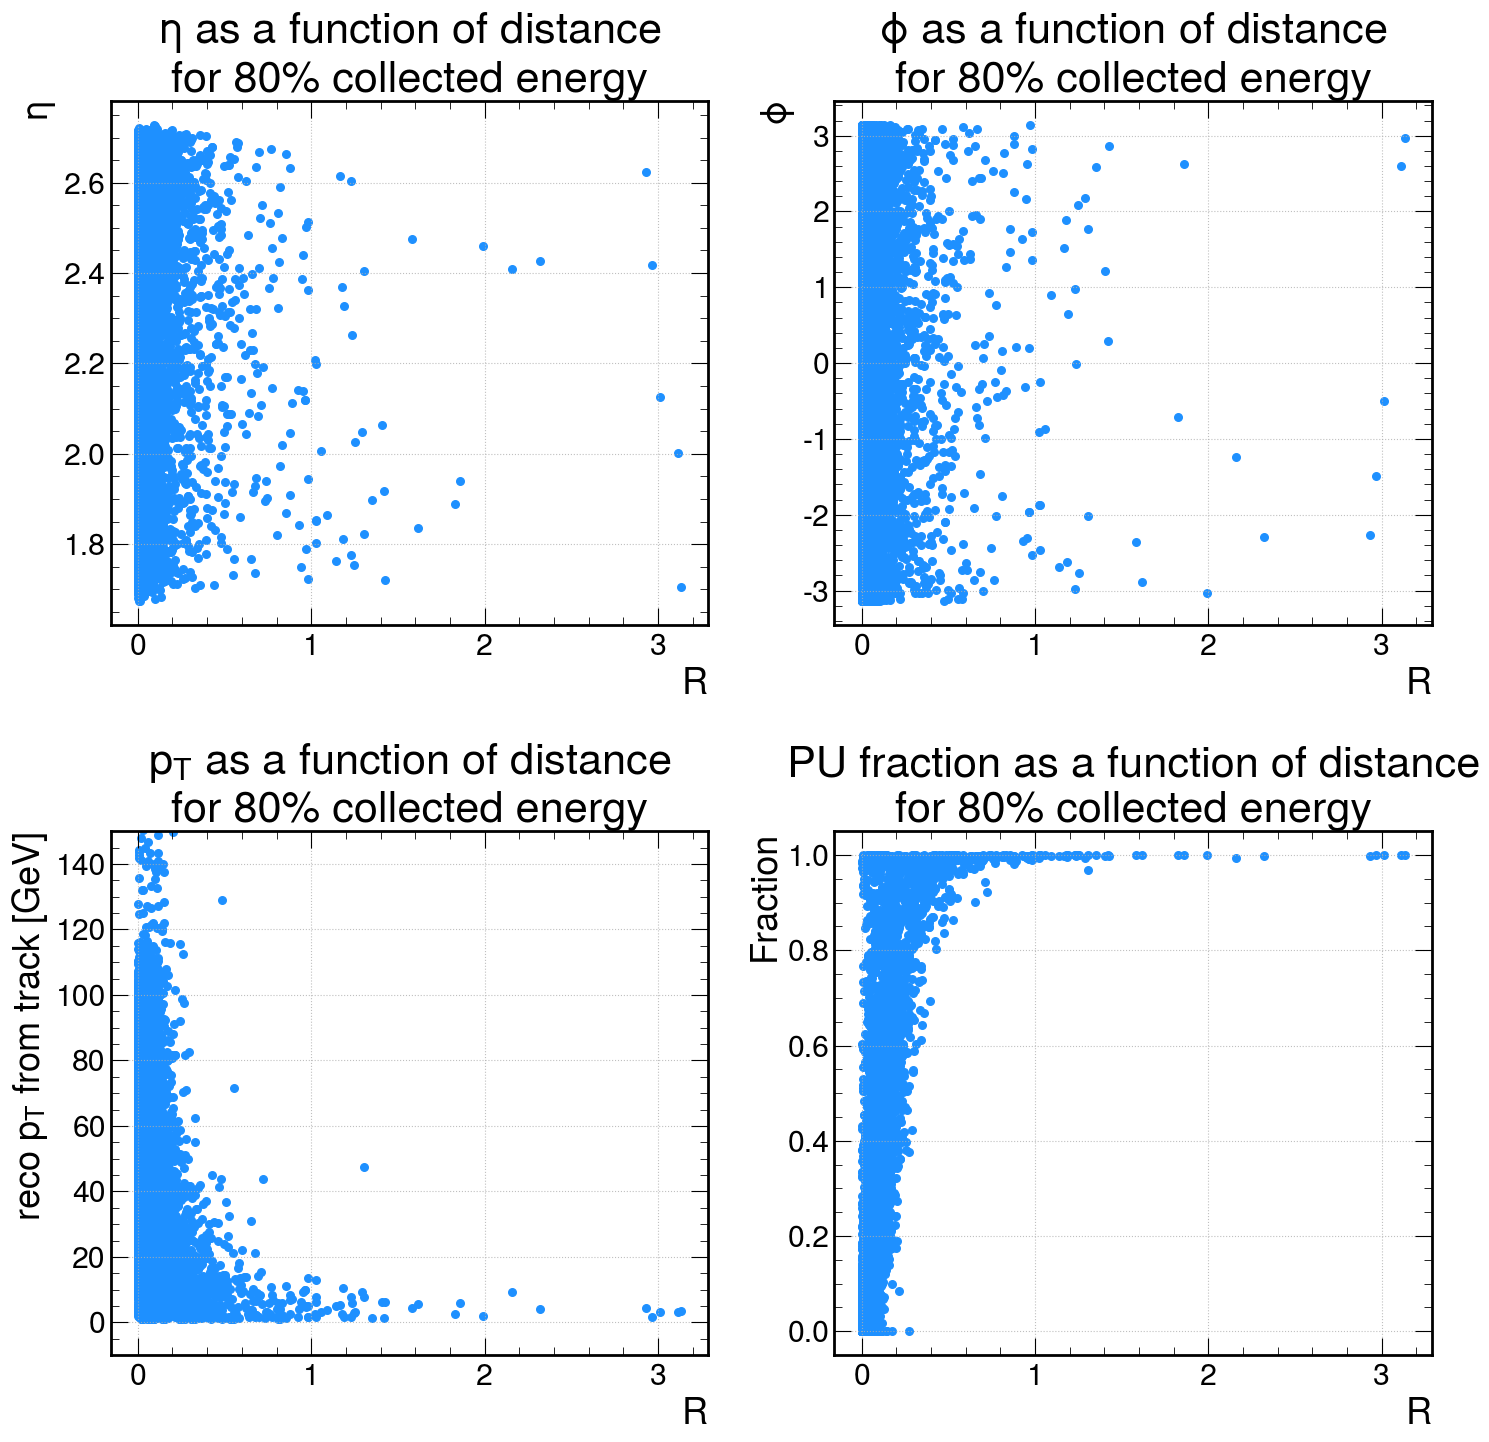

In [10]:

with open('results.pkl', 'rb') as file:
    dict_info=pickle.load(file)

#print(len(dict_info["R"]),len(dict_info["pt_trk"]),len(dict_info["phi_trk"]),len(dict_info["eta_trk"]),len(dict_info["contamination"]))

def scatterAx(ax, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)', xlim=None, ylim=None):
    try:
        ax.scatter(ak.flatten(X), ak.flatten(Y), s=ak.flatten(s), color='dodgerblue')
    except:
        ax.scatter(X, Y, s=s, color='dodgerblue')
    
    # Imposta i limiti sugli assi se sono forniti
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    # Imposta titolo, etichette e griglia
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()


fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
scatterAx(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
scatterAx(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
scatterAx(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='reco $p_T$ from track [GeV]',ylim=(-10,150))
scatterAx(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

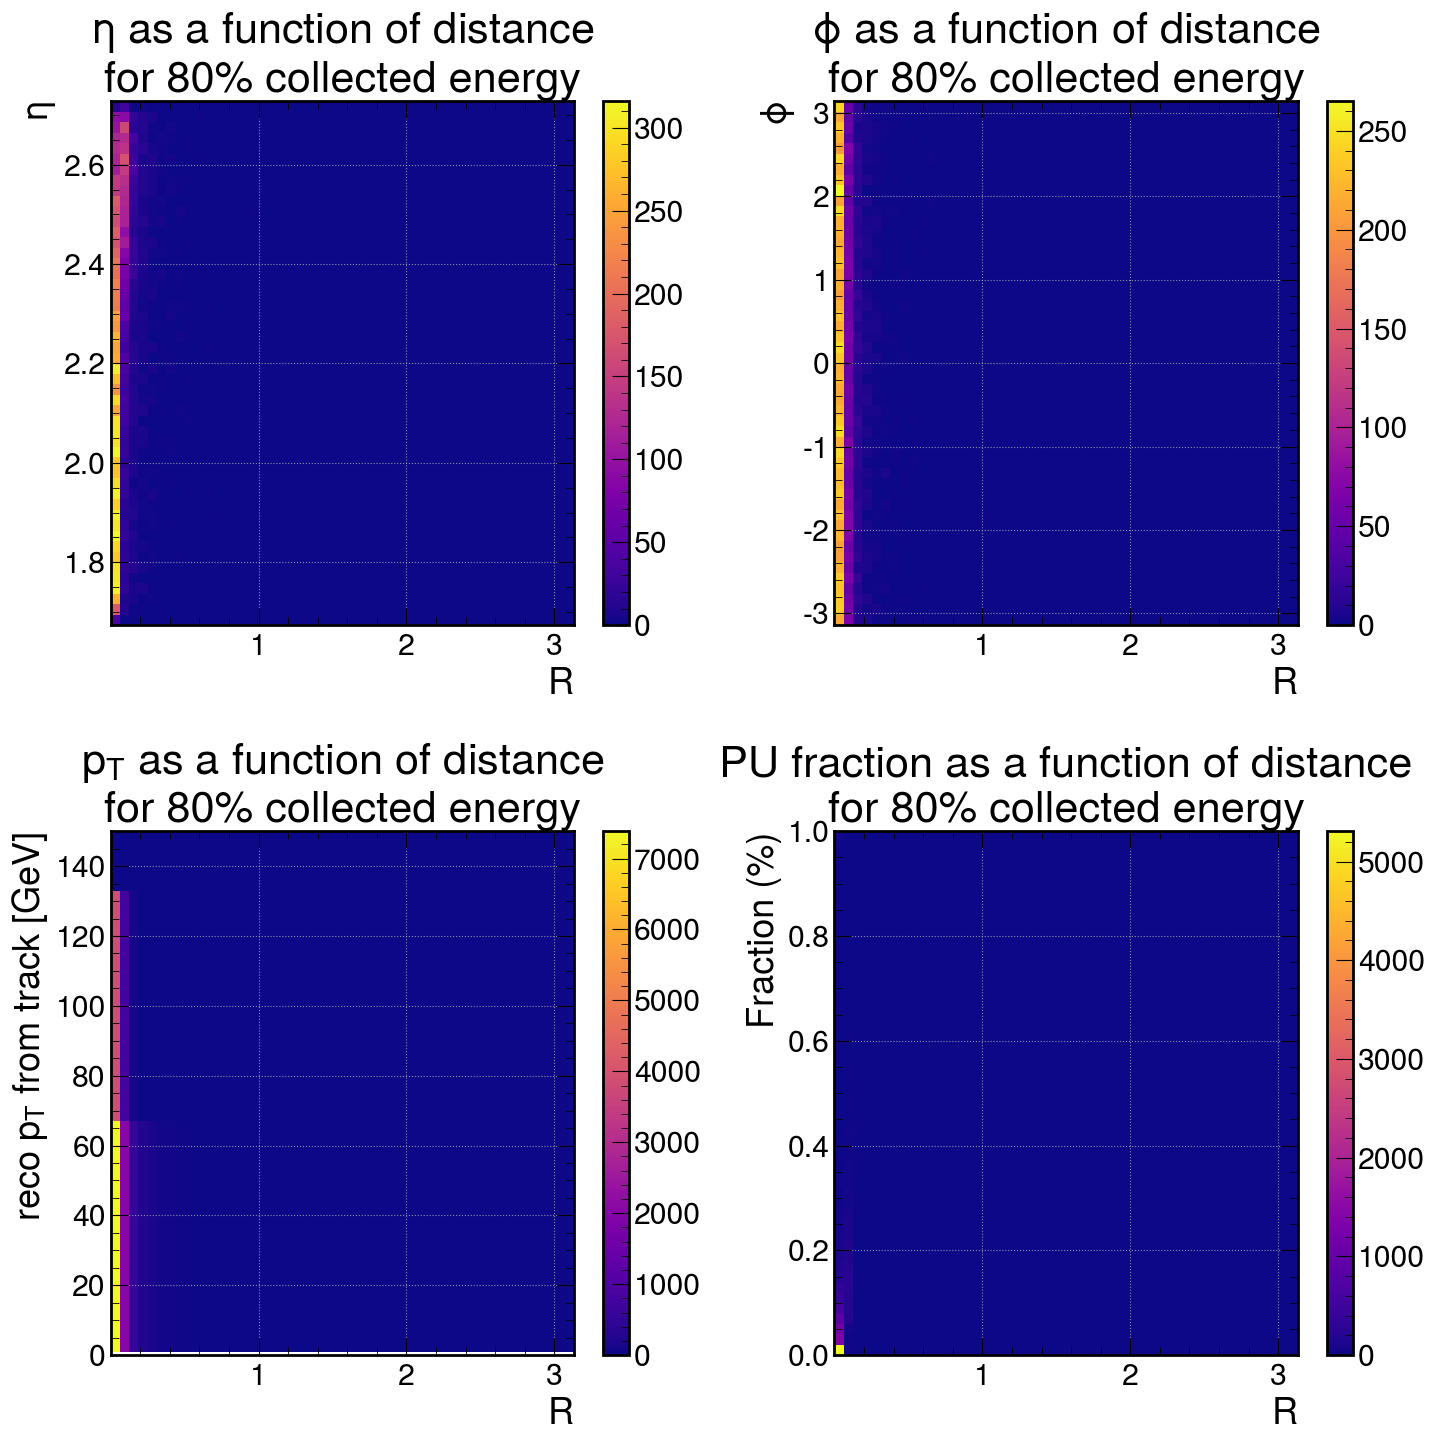

In [11]:
import matplotlib.colors as mcolors  # Import necessario per la scala logaritmica

def hist2D_Ax(ax, X, Y, bins=50, title='title', xlabel='time (ns)', ylabel='z (cm)', xlim=None, ylim=None, log_scale=False):
    try:
        if log_scale:
            # Usa una scala logaritmica per la colorazione
            hist = ax.hist2d(ak.flatten(X), ak.flatten(Y), bins=bins, cmap='plasma', norm=mcolors.LogNorm())
        else:
            hist = ax.hist2d(ak.flatten(X), ak.flatten(Y), bins=bins, cmap='plasma')
    except:
        if log_scale:
            hist = ax.hist2d(X, Y, bins=bins, cmap='plasma', norm=mcolors.LogNorm())
        else:
            hist = ax.hist2d(X, Y, bins=bins, cmap='plasma')
    
    # Imposta i limiti sugli assi se sono forniti
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)

    # Imposta titolo, etichette e griglia
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Aggiungi la barra dei colori con una scala logaritmica
    plt.colorbar(hist[3], ax=ax)
    
    ax.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
hist2D_Ax(axs[0], dict_info["R"], (dict_info["eta_trk"]), title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
hist2D_Ax(axs[1], dict_info["R"], dict_info["phi_trk"],  title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
hist2D_Ax(axs[2], dict_info["R"], dict_info["pt_trk"],  title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='reco $p_T$ from track [GeV]',ylim=(0,150))
hist2D_Ax(axs[3], dict_info["R"], dict_info["contamination"],  title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

# BDT

In [15]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

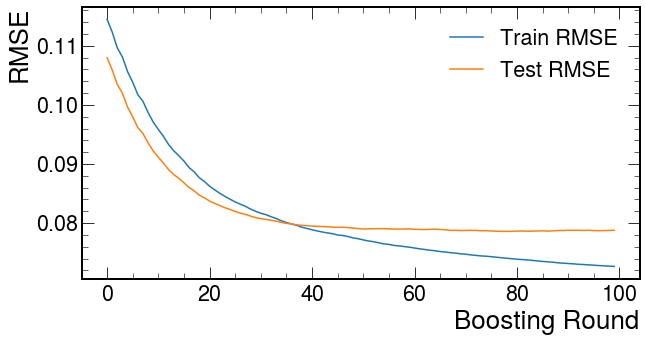

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          0.114365        0.000356        0.114457       0.001541
1          0.112213        0.000331        0.112388       0.001501
2          0.109513        0.000321        0.109795       0.001545
3          0.107913        0.000302        0.108316       0.001541
4          0.105485        0.000323        0.105991       0.001584
..              ...             ...             ...            ...
68         0.073852        0.000404        0.081673       0.001622
69         0.073748        0.000400        0.081641       0.001630
70         0.073649        0.000401        0.081642       0.001634
71         0.073552        0.000407        0.081615       0.001644
72         0.073443        0.000419        0.081606       0.001651

[73 rows x 4 columns]
Mean Squared Error: 0.014212544315441826


In [16]:
#array_ts_info = np.array(ts_info).T

data_dict = dict_info
#print(data_dict)
df = pd.DataFrame(data_dict)
df_features = df[['eta_trk','phi_trk','pt_trk',"etaErr","phiErr", "etaphiCov"]]#, "deltaR_trk"]]
df_label = df[['R', 'contamination']]
df_weights=df[["simEnergy"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(df_features, df_label, df_weights, test_size=0.1, random_state=42)

# Convert to DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train, weight=w_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test, weight=w_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.05,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'alpha' : 0.5,
    'lambda' : 1,
    'gamma' : 0.1
}

# Train the model
evals_result = {}

xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100, evals=[(train_dmatrix, 'train'), (test_dmatrix, 'test')],
    evals_result=evals_result,  verbose_eval=False)
# Plot train vs test RMSE over time
plt.figure(figsize=(10, 5))
plt.plot(evals_result['train']['rmse'], label='Train RMSE')
plt.plot(evals_result['test']['rmse'], label='Test RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Perform cross-validation
cv_results = xgb.cv(
    params, 
    train_dmatrix, 
    num_boost_round=100, 
    nfold=5,  # Number of folds
    metrics="rmse",  # Metric to monitor, e.g., RMSE for regression
    early_stopping_rounds=10,  # Stops if there's no improvement
    as_pandas=True,
    seed=42
)

# Print the results of cross-validation
print(cv_results)




# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)
y_pred_train = xg_reg.predict(train_dmatrix)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [17]:
X_test, y_test

(        eta_trk   phi_trk     pt_trk    etaErr    phiErr     etaphiCov
 150    2.277729 -2.945608  50.337887  0.000110  0.000069 -4.245794e-10
 3465   2.665228  0.587361  93.648735  0.000062  0.000070 -1.247581e-10
 8459   2.115908 -2.673444  83.041748  0.000105  0.000053  3.392179e-10
 1547   2.286021 -0.992533   8.147990  0.000441  0.000606 -1.481806e-08
 903    1.978640  3.017205  67.703026  0.000185  0.000051  1.827542e-09
 ...         ...       ...        ...       ...       ...           ...
 11960  1.924427  1.006813  94.958397  0.000176  0.000046  1.114391e-09
 11356  2.507652  0.797141  70.655807  0.000093  0.000820 -9.759524e-09
 6425   2.118046  1.397585  93.004120  0.000093  0.000052  1.501797e-10
 14357  2.137583  1.681452  51.559475  0.000163  0.000048 -2.338633e-10
 2656   1.906532 -1.771016  49.837013  0.000104  0.000640 -2.213271e-09
 
 [1546 rows x 6 columns],
               R  contamination
 150    0.023331       0.066740
 3465   0.069472       0.059472
 8459   0.01

In [18]:
y_test, y_pred

(              R  contamination
 150    0.023331       0.066740
 3465   0.069472       0.059472
 8459   0.014894       0.064784
 1547   0.077381       0.345369
 903    0.038528       0.066922
 ...         ...            ...
 11960  0.010031       0.000000
 11356  0.103168       0.241880
 6425   0.000510       0.000000
 14357  0.003454       0.095769
 2656   0.291868       0.423484
 
 [1546 rows x 2 columns],
 array([[0.03070342, 0.06401549],
        [0.0529656 , 0.07870336],
        [0.02143606, 0.02841381],
        ...,
        [0.02155737, 0.02712699],
        [0.02264881, 0.04080337],
        [0.11011801, 0.23663981]], dtype=float32))

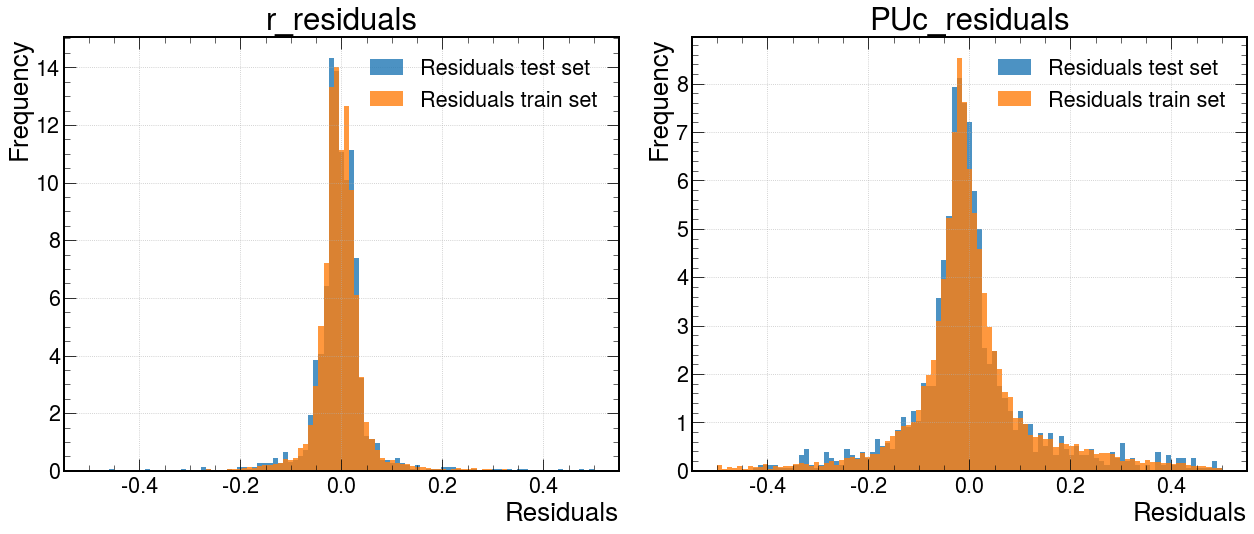

In [19]:
# Assuming y_test is a DataFrame or a numpy array with two columns (r and PUc)
# y_pred is the predicted output from the model


residuals_train=np.array(y_train)-y_pred_train


# Convert y_test to a numpy array (if it's a DataFrame)
y_test_array = np.array(y_test)

# Compute residuals
residuals = y_test_array - y_pred



# Convert residuals to a DataFrame for easy handling
residuals_df = pd.DataFrame(residuals, columns=['r_residuals', 'PUc_residuals'])
residuals_train_df=pd.DataFrame(residuals_train, columns=['r_residuals', 'PUc_residuals'])
# Calculate mean and standard deviation for both r_residuals and PUc_residuals
r_mean = residuals_df['r_residuals'].mean()
r_std = residuals_df['r_residuals'].std()

PUc_mean = residuals_df['PUc_residuals'].mean()
PUc_std = residuals_df['PUc_residuals'].std()

# Plot the residuals
fig, axs = plt.subplots(1, 2, figsize=(18,8))
rng=0.5
bins = np.linspace(-rng, rng, 100)  # bins=30 implica 31 bin edges
# Step 3: Crea gli istogrammi con lo stesso binning
residuals_df['r_residuals'].hist(bins=bins, ax=axs[0], density=True, alpha=0.8, label='Residuals test set')
residuals_train_df['r_residuals'].hist(bins=bins, ax=axs[0], density=True, alpha=0.8, label='Residuals train set')

axs[0].set_title(f'r_residuals')
axs[0].legend()
#axs[0].text(0.1, 100, f'Mean: {r_mean:.5f}\nStd: {r_std:.5f}')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

min_value = min(residuals_df['PUc_residuals'].min(), residuals_train_df['PUc_residuals'].min())
max_value = max(residuals_df['PUc_residuals'].max(), residuals_train_df['PUc_residuals'].max())
rng=0.5
bins = np.linspace(-rng, rng, 100)  # bins=30 implica 31 bin edges
# Step 3: Crea gli istogrammi con lo stesso binning
residuals_df['PUc_residuals'].hist(bins=bins, ax=axs[1], density=True, alpha=0.8, label='Residuals test set')
residuals_train_df['PUc_residuals'].hist(bins=bins, ax=axs[1], density=True, alpha=0.8, label='Residuals train set')

# Aggiungi legende per distinguere i due dataset
axs[1].legend()

axs[1].set_title(f'PUc_residuals')
#axs[1].text(0.05, 100, f'Mean: {PUc_mean:.5f}\nStd: {PUc_std:.5f}')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

Number of trees in the model: 100


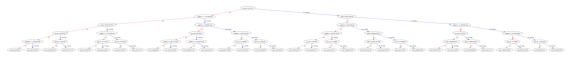

In [21]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

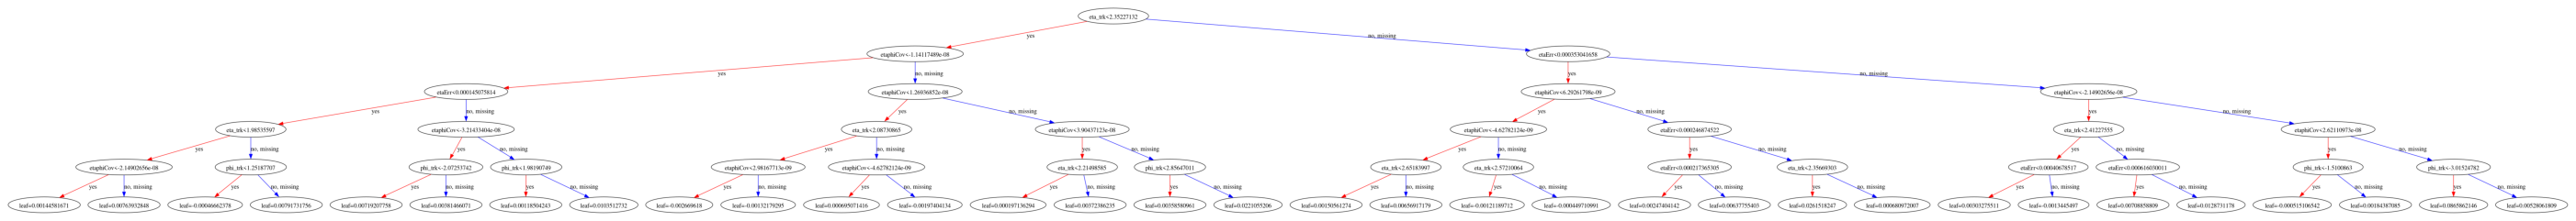

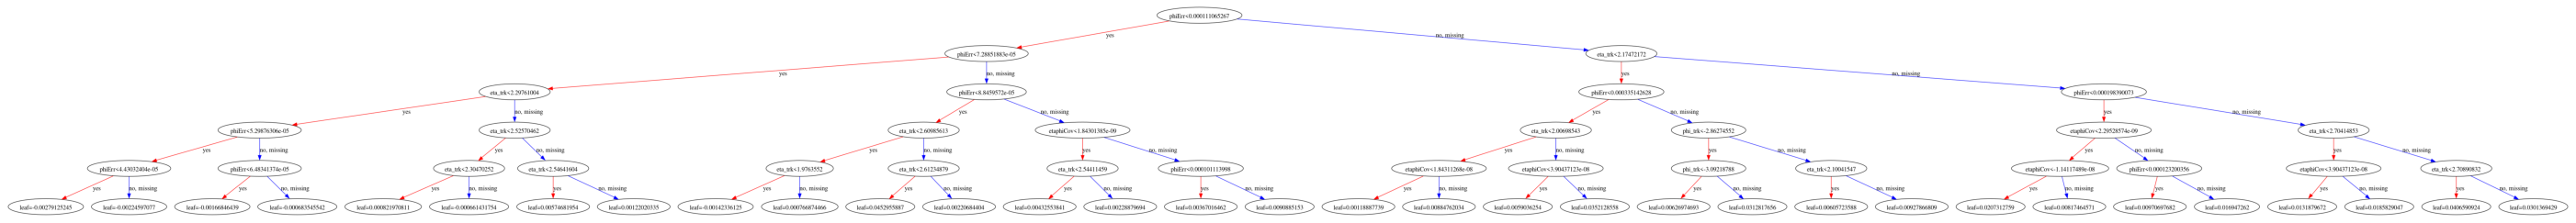

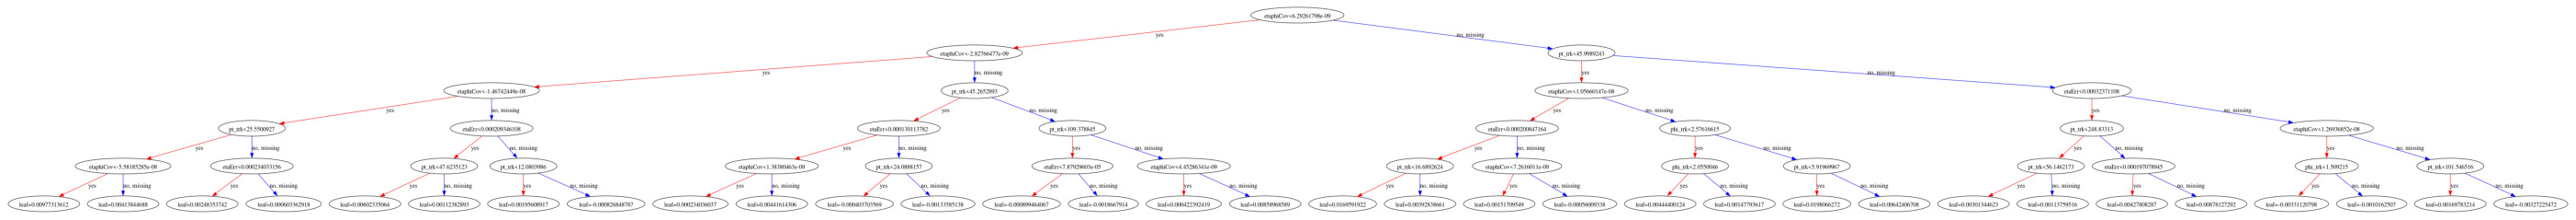

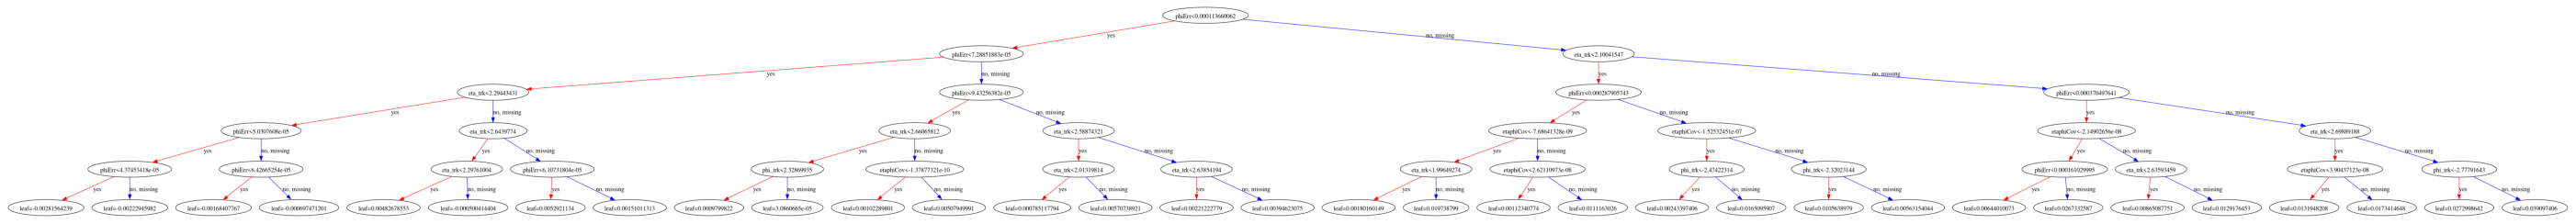

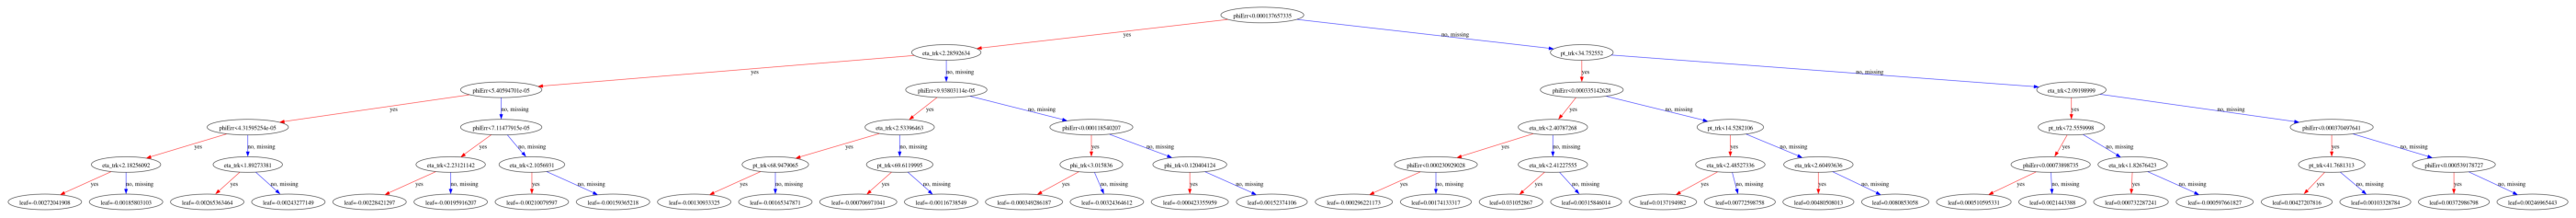

In [22]:
for i in range(5):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [23]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_reg = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3,4, 5, 7, 9],
    #'learning_rate': [0.01, 0.05, 0.1],
    'eta': [0.01, 0.05,0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0,0.05, 0.1, 0.2],
    'lambda': [1, 1.3, 1.5, 1.7, 2],
    'alpha': [0, 0.05, 0.1, 0.2, 0.3, 0.5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE: {-grid_search.best_score_}")

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_

# Predict on the test data
y_pred = best_xgb.predict(X_test)

# Calculate MSE on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse}")


Fitting 3 folds for each of 21600 candidates, totalling 64800 fits
Best parameters found: {'alpha': 0.1, 'colsample_bytree': 1.0, 'eta': 0.05, 'gamma': 0, 'lambda': 1.5, 'max_depth': 3, 'subsample': 1.0}
Best cross-validated MSE: 0.01604586264527105
Mean Squared Error on test data: 0.013815974392641301


{'objective': 'reg:squarederror', 'alpha': 0.1, 'colsample_bytree': 1.0, 'eta': 0.05, 'gamma': 0, 'lambda': 1.5, 'max_depth': 3, 'subsample': 1.0}


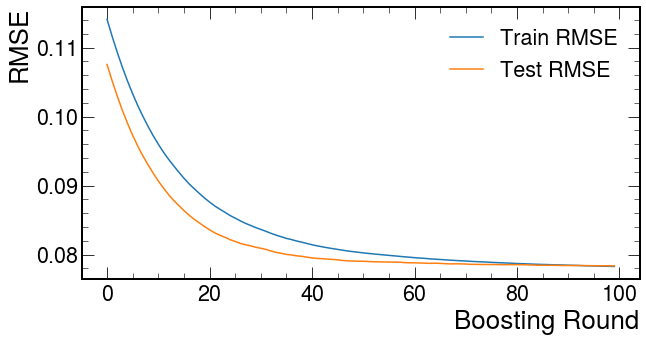

Mean Squared Error: 0.01413254047398102
Number of trees in the model: 100


In [28]:
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
}

params.update(grid_search.best_params_)
print(params)

# Train the model
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100,evals=[(train_dmatrix, 'train'), (test_dmatrix, 'test')],
    evals_result=evals_result,  verbose_eval=False)
# Plot train vs test RMSE over time
plt.figure(figsize=(10, 5))
plt.plot(evals_result['train']['rmse'], label='Train RMSE')
plt.plot(evals_result['test']['rmse'], label='Test RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
"""
# Assume you have a DataFrame called new_data with the same structure as your training data
new_data = pd.DataFrame({
    'z': [360,300],         # Example values for new data
    'eta': [1.7, 2.3],
    'phi': [0.3, 0.4],
    'energy': [150, 55]    # Example PU contamination values
})

# Convert to DMatrix format for XGBoost
new_dmatrix = xgb.DMatrix(new_data)

# Use the trained model to predict r values for new data
y_new_pred = xg_reg.predict(new_dmatrix)

# Display the predictions
print(f"Predicted r values for new data: {y_new_pred}")
"""
# Get the number of trees in the model
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

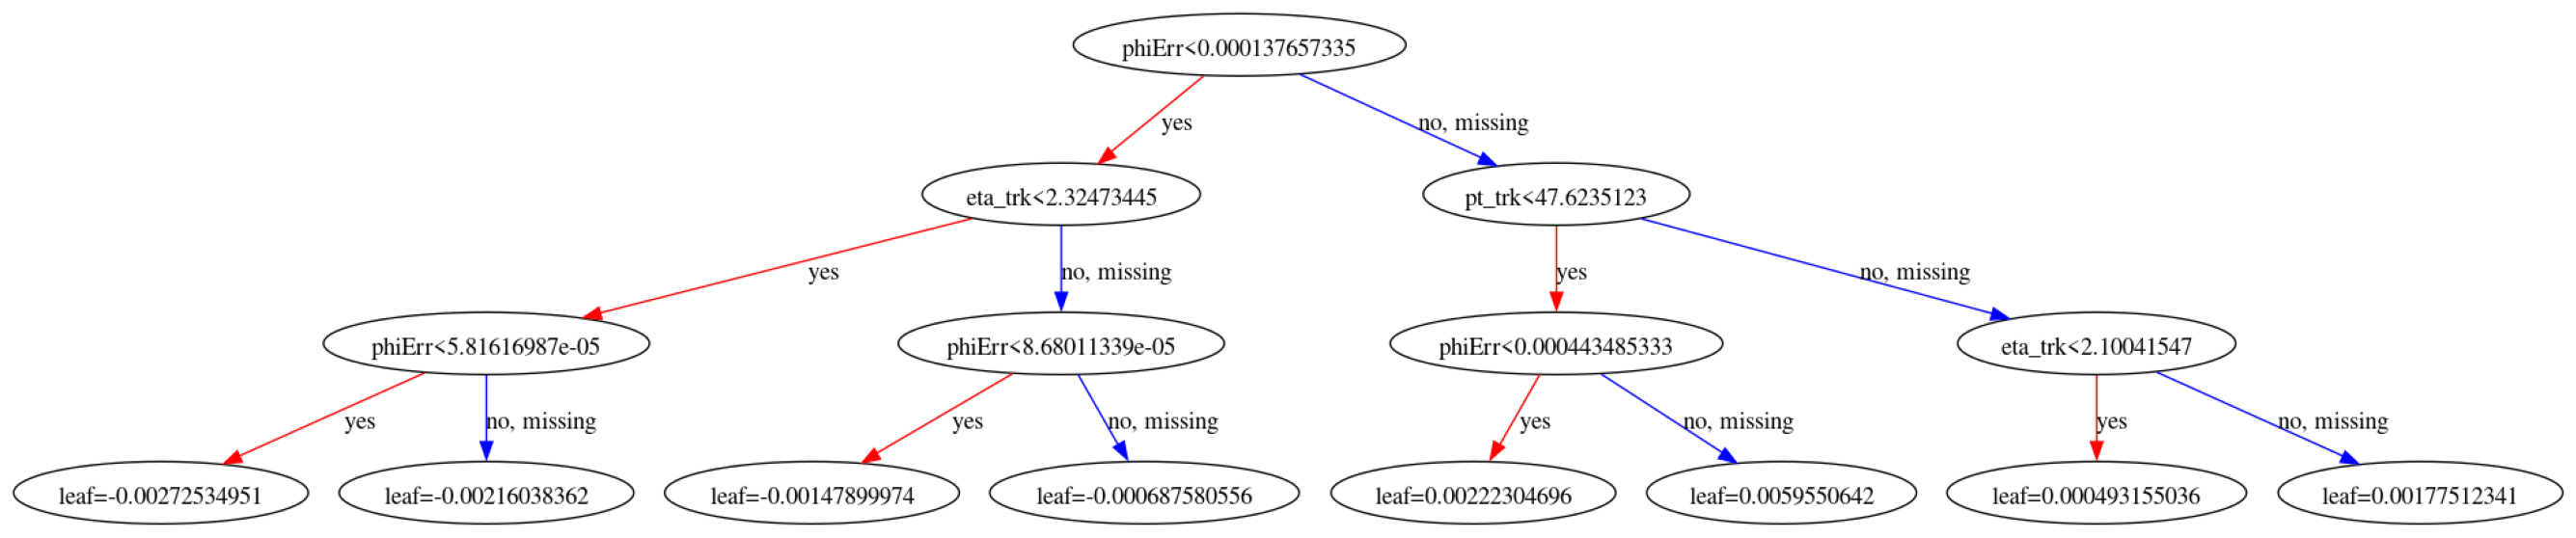

In [29]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

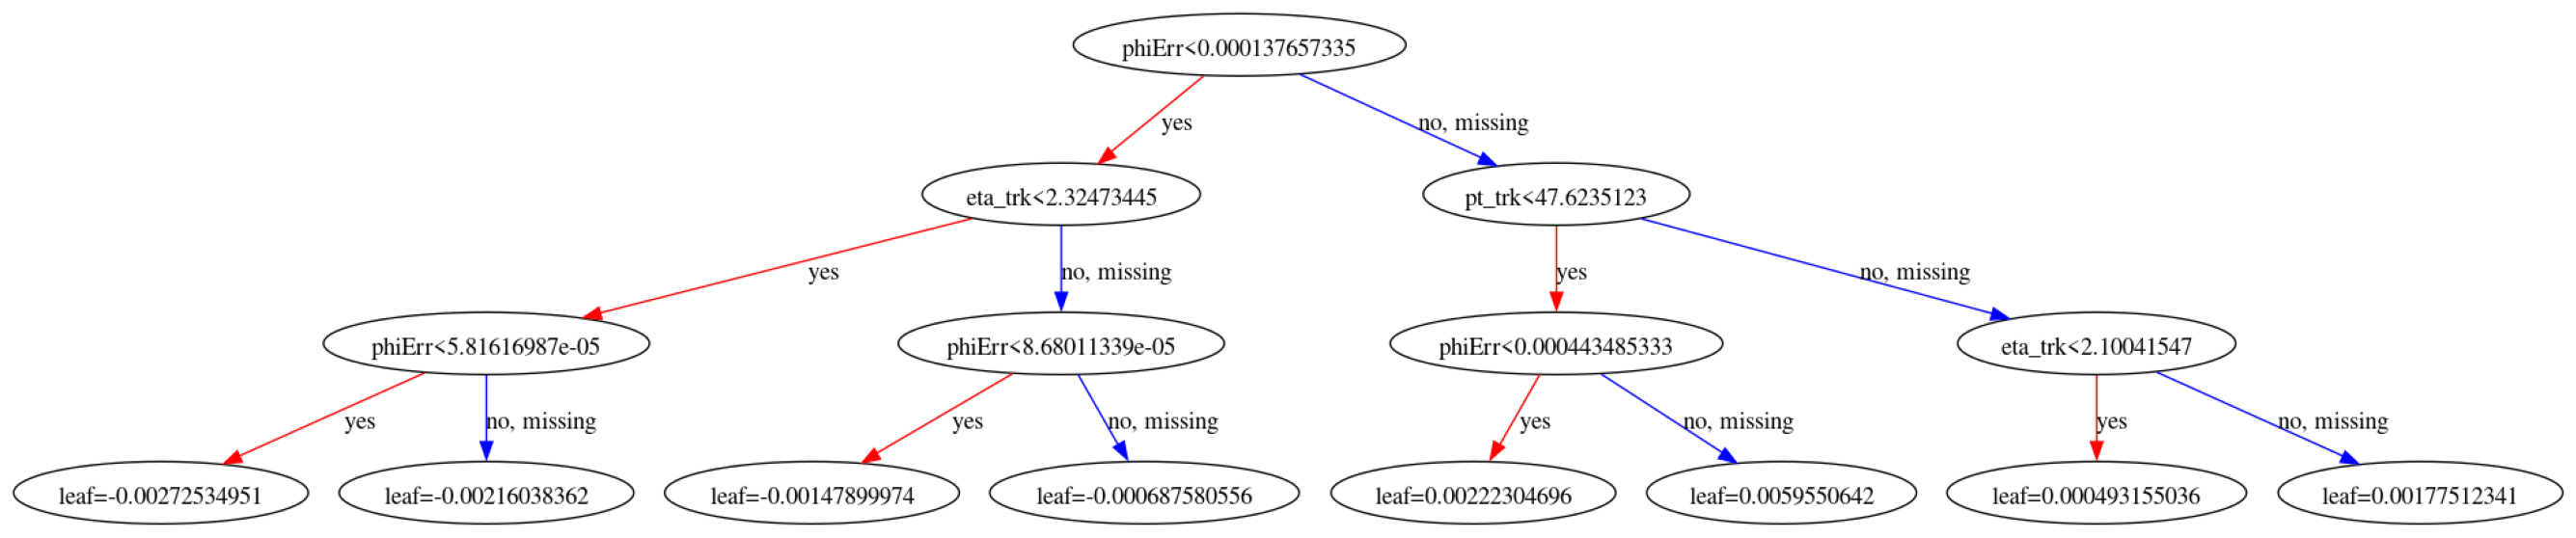

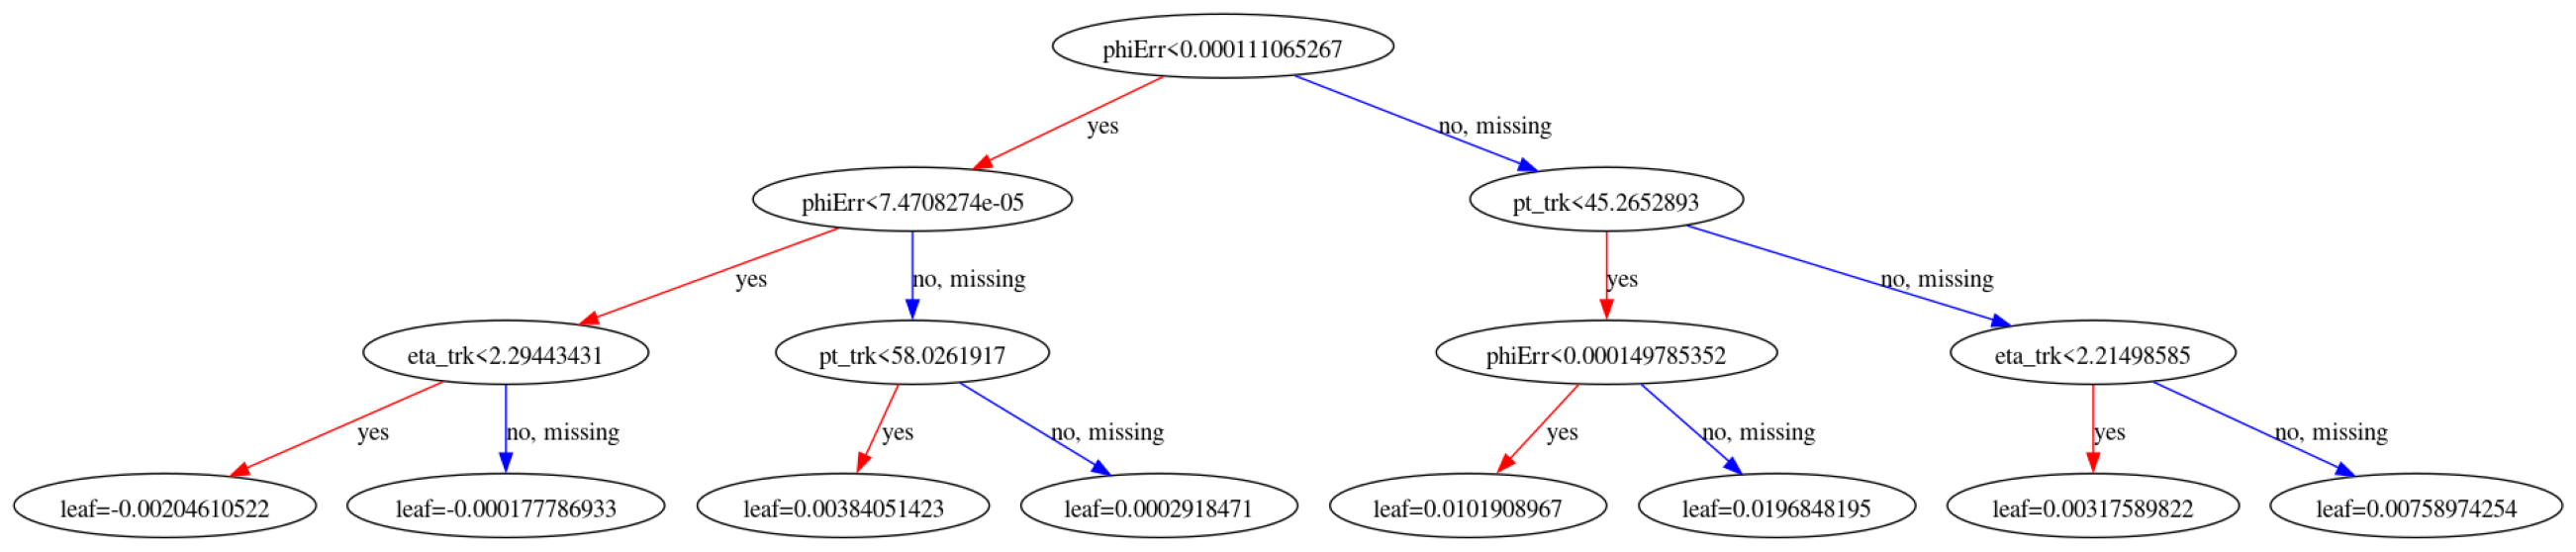

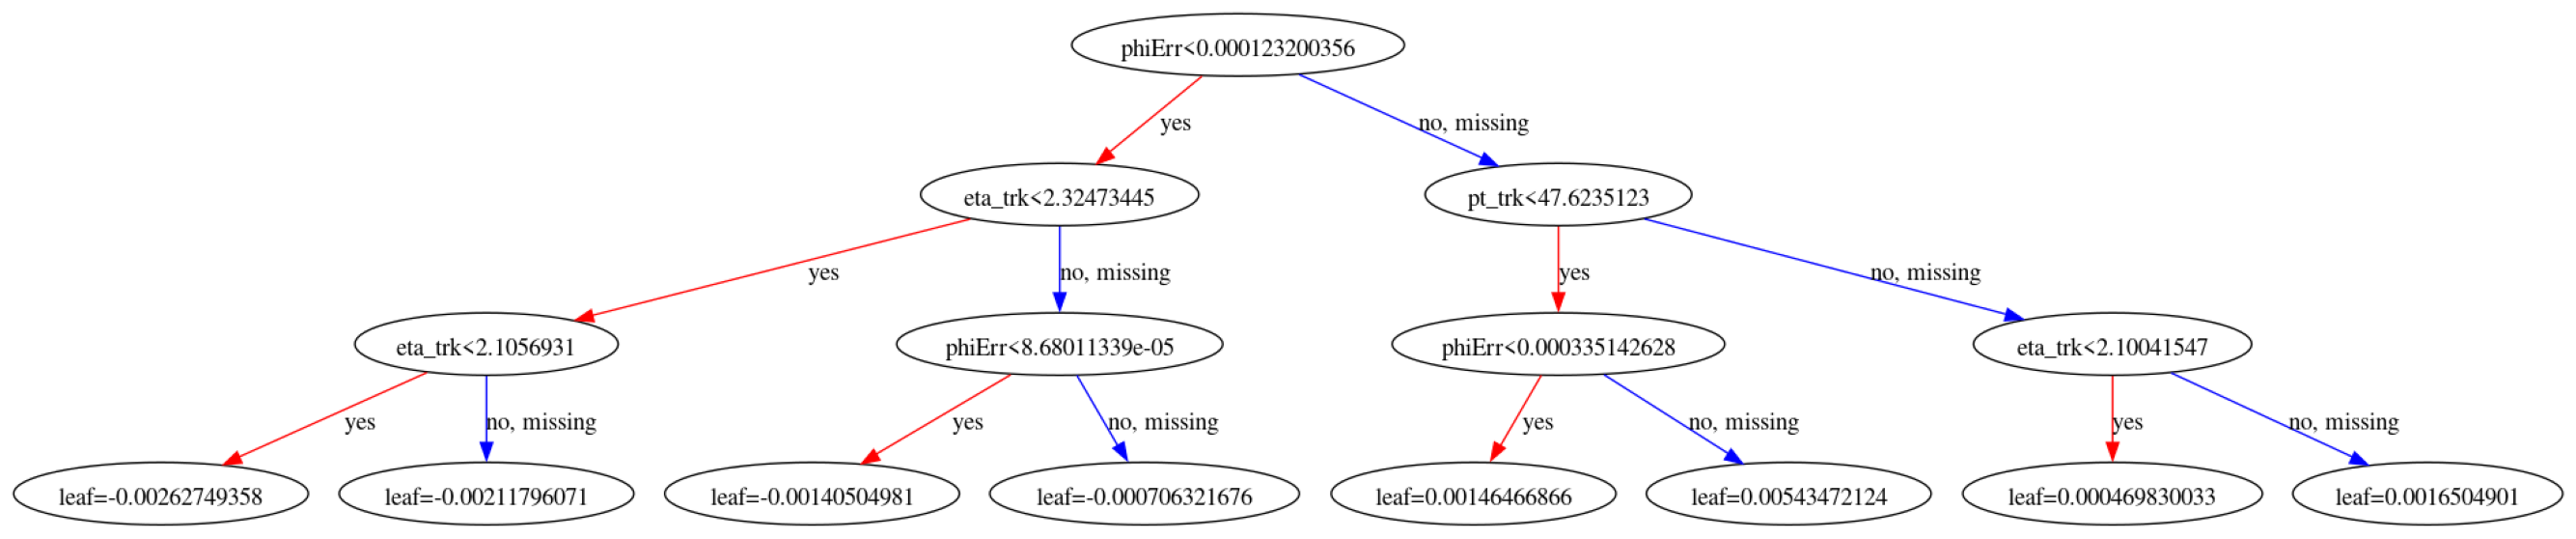

In [30]:
for i in range(3):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [31]:
# # save to JSON
xg_reg.save_model("model230files.json")

# model_xgb_2 = xgb.Booster()
# model_xgb_2.load_model("model.json")

Feature Importance (by frequency): {'eta_trk': 364.0, 'phi_trk': 40.0, 'pt_trk': 381.0, 'etaErr': 106.0, 'phiErr': 420.0, 'etaphiCov': 89.0}


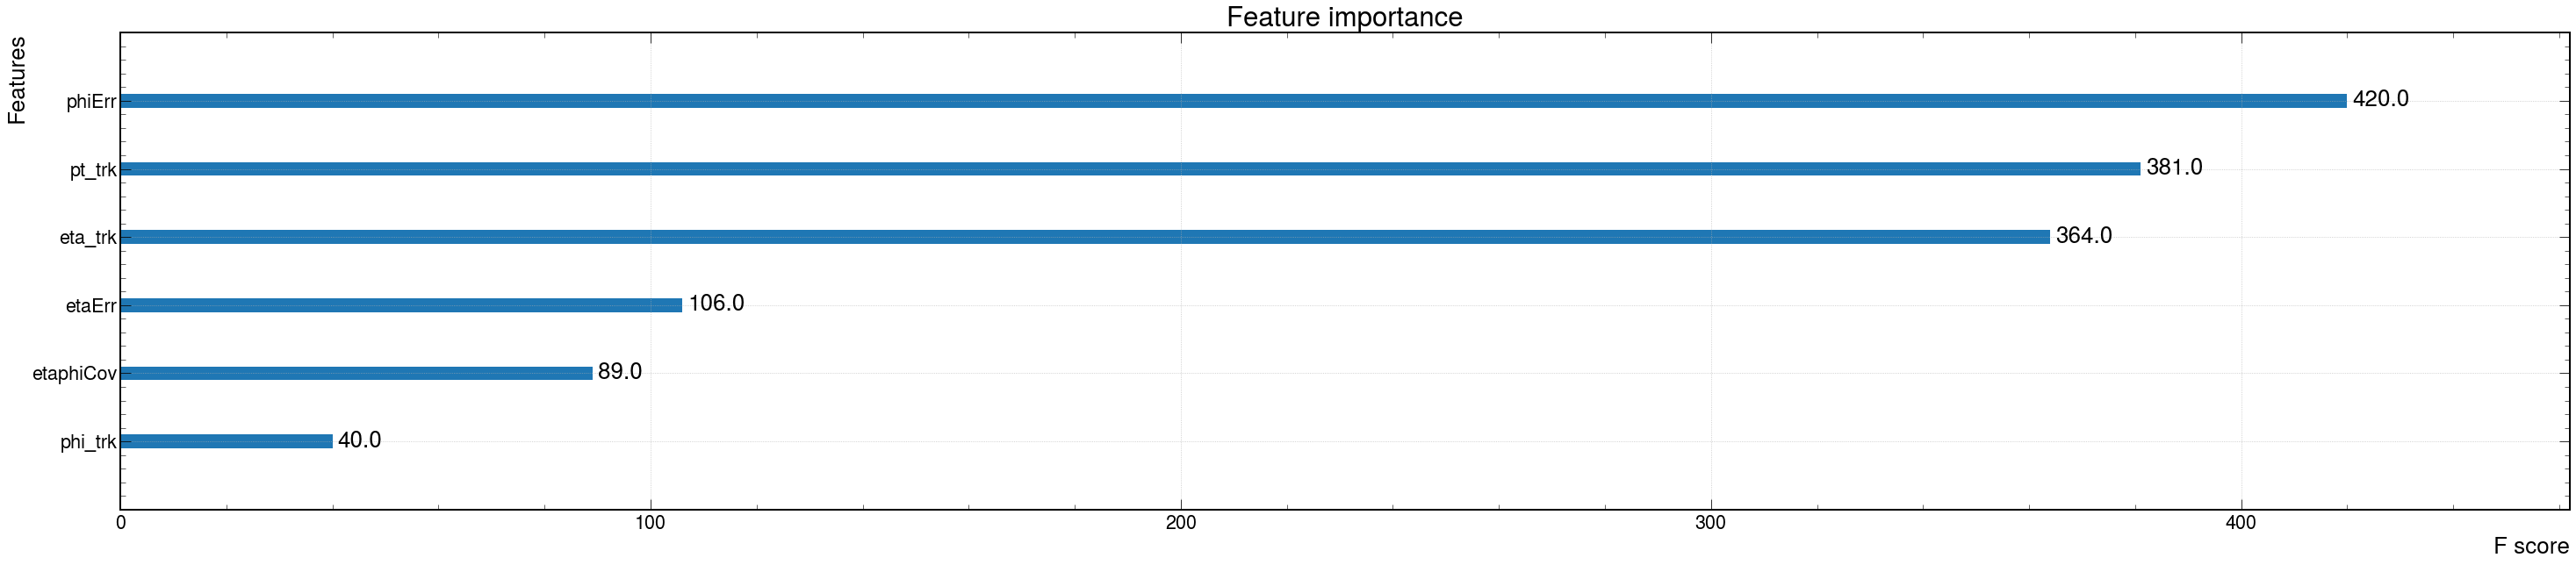

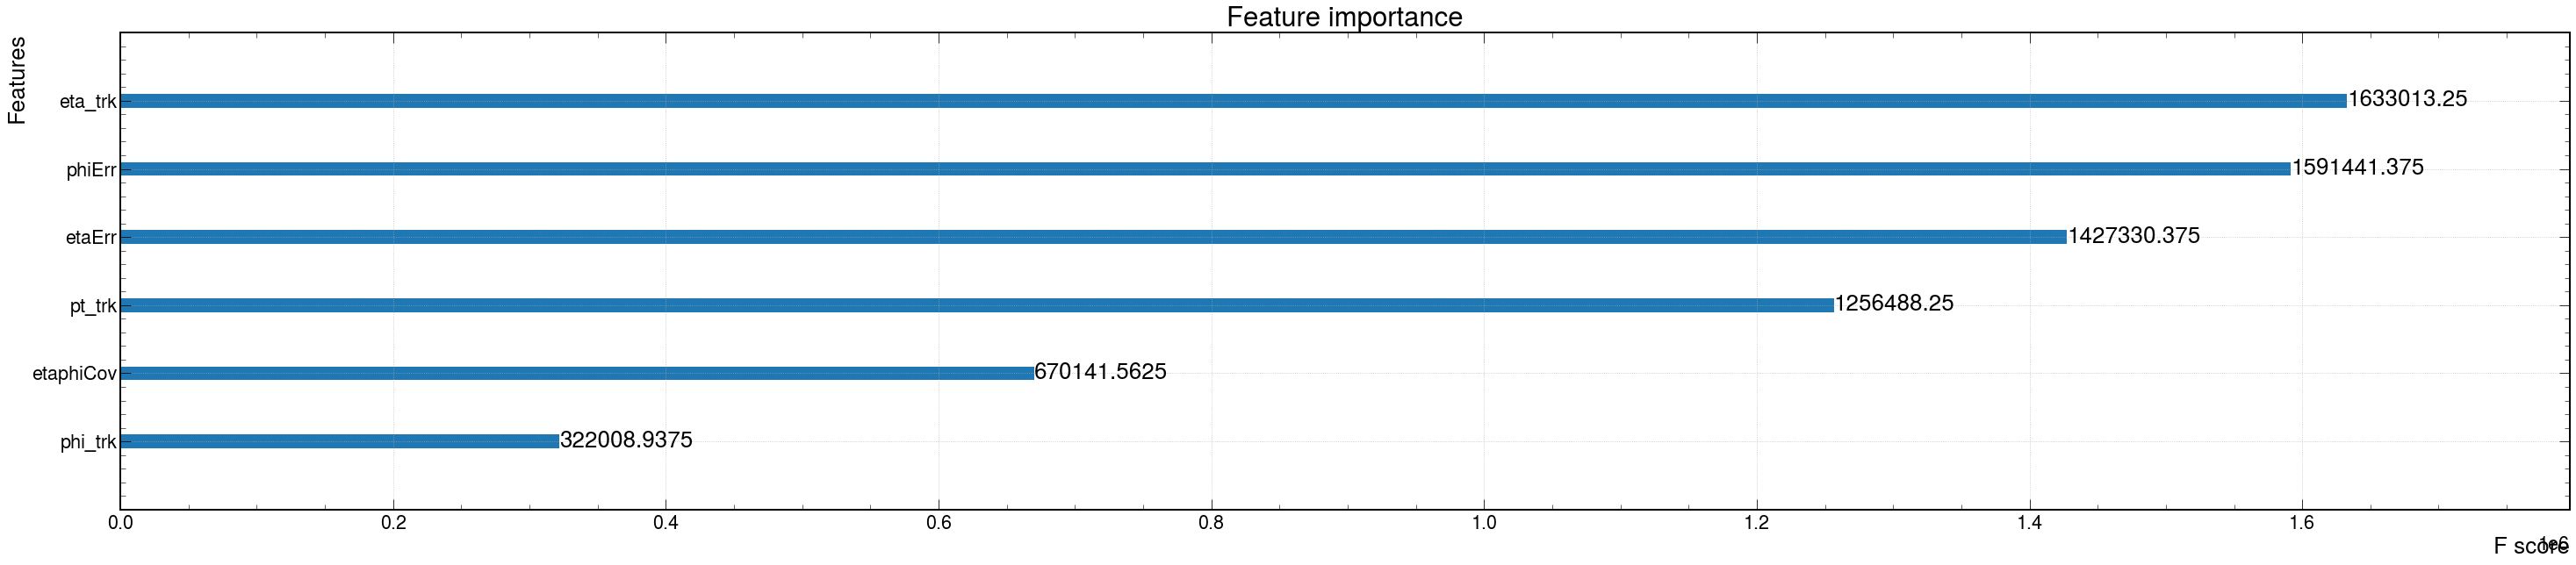

     Feature  Importance
4     phiErr  711.946106
2     pt_trk  291.790894
0    eta_trk  112.392204
5  etaphiCov   30.604538
1    phi_trk   20.015400
3     etaErr   19.964121


In [32]:
# Get feature importance as a dictionary
feature_importance = xg_reg.get_score(importance_type='weight')
print("Feature Importance (by frequency):", feature_importance)


import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance (default: based on weight, i.e., frequency)
xgb.plot_importance(xg_reg, importance_type='weight')
plt.show()

# # You can also plot feature importance based on 'gain' or 'cover':
# # Gain: the improvement in accuracy brought by a feature to the branches it is on
# ax = xgb.plot_importance(xg_reg, importance_type='gain')
# plt.show()

# Cover: the relative number of observations affected by a feature
xgb.plot_importance(xg_reg, importance_type='cover')
plt.show()

import pandas as pd

# Get feature importance by gain
importance_dict = xg_reg.get_score(importance_type='gain')

# Convert to a pandas DataFrame for better visualization and analysis
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)


In [33]:
#!pip install shap

In [34]:
import sys
sys.path.append('/eos/home-t/tipaulet/.local/lib/python3.9/site-packages')
import shap

print(X_test.corr())

            eta_trk   phi_trk    pt_trk    etaErr    phiErr  etaphiCov
eta_trk    1.000000 -0.031916  0.027548 -0.141826  0.034124  -0.000632
phi_trk   -0.031916  1.000000  0.025615 -0.027471 -0.000786  -0.005329
pt_trk     0.027548  0.025615  1.000000 -0.484310 -0.129179   0.036226
etaErr    -0.141826 -0.027471 -0.484310  1.000000  0.374658  -0.364509
phiErr     0.034124 -0.000786 -0.129179  0.374658  1.000000  -0.422000
etaphiCov -0.000632 -0.005329  0.036226 -0.364509 -0.422000   1.000000


In [35]:
# Create an explainer using your trained model
explainer = shap.TreeExplainer(xg_reg)

# Compute SHAP values for your test data
shap_values = explainer.shap_values(X_test)

In [36]:
# Assuming two outputs, you can extract SHAP values for each
shap_values_r = shap_values[:, :, 0]  # SHAP values for the first output 'r'
shap_values_puc = shap_values[:, :, 1]  # SHAP values for the second output 'PUc'

# Convert SHAP values for 'r' to a DataFrame
shap_values_r_df = pd.DataFrame(shap_values_r, columns=X_test.columns)
print(shap_values_r_df.describe())

# Convert SHAP values for 'PUc' to a DataFrame (optional, if you want to analyze PUc separately)
shap_values_puc_df = pd.DataFrame(shap_values_puc, columns=X_test.columns)
print(shap_values_puc_df.describe())

           eta_trk      phi_trk       pt_trk       etaErr       phiErr  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000   
mean     -0.003897     0.000033     0.005162    -0.000330     0.007338   
std       0.011914     0.001233     0.019497     0.002810     0.043568   
min      -0.031553    -0.006610    -0.022366    -0.021152    -0.016511   
25%      -0.014489    -0.000100    -0.002644    -0.000034    -0.013271   
50%      -0.008346     0.000057     0.001278     0.000023    -0.011454   
75%       0.007591     0.000081     0.005009     0.000118    -0.003402   
max       0.039747     0.027687     0.214516     0.025112     0.311042   

         etaphiCov  
count  1546.000000  
mean      0.000003  
std       0.001730  
min      -0.020239  
25%      -0.000077  
50%       0.000025  
75%       0.000131  
max       0.012731  
           eta_trk      phi_trk       pt_trk       etaErr       phiErr  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000

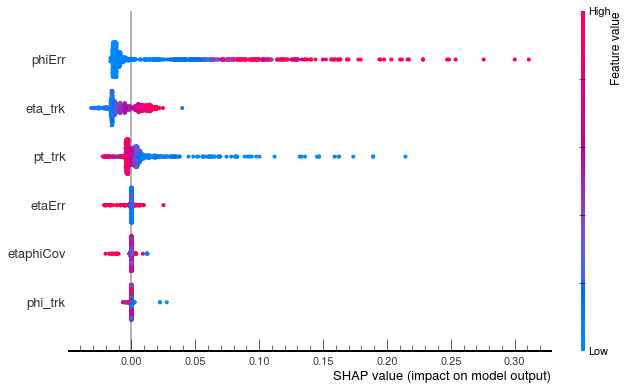

In [37]:
# Plot SHAP summary for 'r'
shap.summary_plot(shap_values_r, X_test, plot_size=(10,6)) # , max_display=X_test.shape[1] is for the max number of variables to be displayed (default is 20)

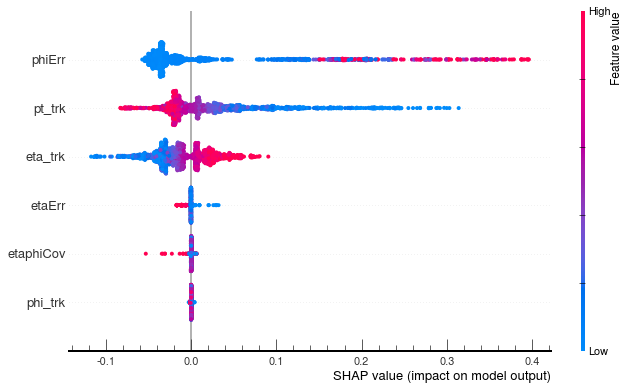

In [38]:
# Plot SHAP summary for 'PUc'
shap.summary_plot(shap_values_puc, X_test, plot_size=(10,6)) 

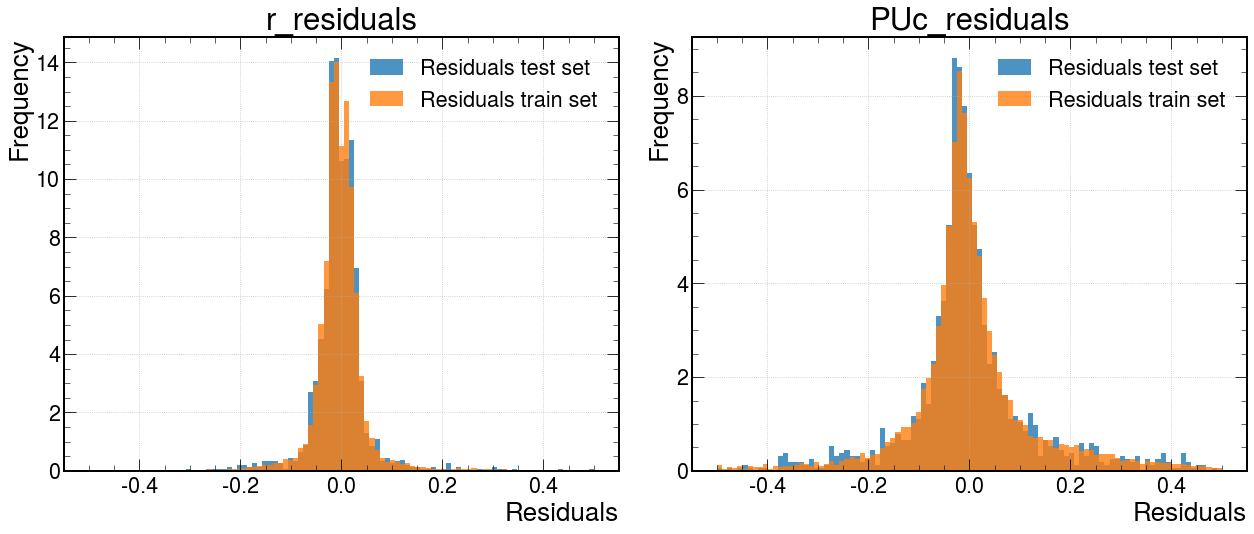

In [39]:
# Assuming y_test is a DataFrame or a numpy array with two columns (r and PUc)
# y_pred is the predicted output from the model


residuals_train=np.array(y_train)-y_pred_train


# Convert y_test to a numpy array (if it's a DataFrame)
y_test_array = np.array(y_test)

# Compute residuals
residuals = y_test_array - y_pred



# Convert residuals to a DataFrame for easy handling
residuals_df = pd.DataFrame(residuals, columns=['r_residuals', 'PUc_residuals'])
residuals_train_df=pd.DataFrame(residuals_train, columns=['r_residuals', 'PUc_residuals'])
# Calculate mean and standard deviation for both r_residuals and PUc_residuals
r_mean = residuals_df['r_residuals'].mean()
r_std = residuals_df['r_residuals'].std()

PUc_mean = residuals_df['PUc_residuals'].mean()
PUc_std = residuals_df['PUc_residuals'].std()

# Plot the residuals
fig, axs = plt.subplots(1, 2, figsize=(18,8))
rng=0.5
bins = np.linspace(-rng, rng, 100)  # bins=30 implica 31 bin edges
# Step 3: Crea gli istogrammi con lo stesso binning
residuals_df['r_residuals'].hist(bins=bins, ax=axs[0], density=True, alpha=0.8, label='Residuals test set')
residuals_train_df['r_residuals'].hist(bins=bins, ax=axs[0], density=True, alpha=0.8, label='Residuals train set')

axs[0].set_title(f'r_residuals')
axs[0].legend()
#axs[0].text(0.1, 100, f'Mean: {r_mean:.5f}\nStd: {r_std:.5f}')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

min_value = min(residuals_df['PUc_residuals'].min(), residuals_train_df['PUc_residuals'].min())
max_value = max(residuals_df['PUc_residuals'].max(), residuals_train_df['PUc_residuals'].max())
rng=0.5
bins = np.linspace(-rng, rng, 100)  # bins=30 implica 31 bin edges
# Step 3: Crea gli istogrammi con lo stesso binning
residuals_df['PUc_residuals'].hist(bins=bins, ax=axs[1], density=True, alpha=0.8, label='Residuals test set')
residuals_train_df['PUc_residuals'].hist(bins=bins, ax=axs[1], density=True, alpha=0.8, label='Residuals train set')

# Aggiungi legende per distinguere i due dataset
axs[1].legend()

axs[1].set_title(f'PUc_residuals')
#axs[1].text(0.05, 100, f'Mean: {PUc_mean:.5f}\nStd: {PUc_std:.5f}')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()